In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

### Read in calendar data

In [33]:
cal_df = pd.read_csv(r'data/calendar.csv')
cal_df.shape

(4587685, 7)

In [34]:
cal_df_filtered = cal_df[cal_df['date'].isnull() == False]
cal_df_filtered.shape

(4587685, 7)

In [35]:
cal_df_filtered.head(4)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,865757,2019-07-13,f,$705.00,$705.00,5,30
1,405722,2019-07-13,f,"$1,017.00","$1,017.00",1,1125
2,405722,2019-07-14,f,"$1,017.00","$1,017.00",1,1125
3,405722,2019-07-15,f,"$1,017.00","$1,017.00",1,1125


In [39]:
cal_df_filtered['datetime'] = cal_df_filtered['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [51]:
cal_df_filtered.set_index(['datetime']).groupby(pd.Grouper(freq='M')).count()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
datetime,,,,,,,
2019-07-31,238811,238811,238811,238811,238811,238811,238811
2019-08-31,389639,389639,389639,389639,389639,389639,389639
2019-09-30,377070,377070,377070,377070,377070,377070,377070
2019-10-31,389639,389639,389639,389639,389639,389639,389639
2019-11-30,377070,377070,377070,377070,377070,377070,377070
2019-12-31,389639,389639,389639,389639,389639,389639,389639
2020-01-31,389639,389639,389639,389639,389639,389639,389639
2020-02-29,364501,364501,364501,364501,364501,364501,364501
2020-03-31,389639,389639,389639,389639,389639,389639,389639


### Read in listings summary data

In [6]:
listings_summary_df = pd.read_csv(r'data/listings_summary.csv')

In [7]:
listings_summary_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1408,3,130,2019-05-02,1.27,1,159
1,101765,Lamma Island flat 2min walk from the beach!,532909,Michael,NaN,Islands,22.20022,114.13461,Entire home/apt,430,2,11,2019-06-09,0.71,1,47
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,853,2,260,2019-07-04,2.65,12,329
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1056,2,259,2019-07-03,2.66,12,308
4,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,939,2,27,2015-06-30,0.28,1,91


### Read in neighbourhoods

In [8]:
neigh_df = pd.read_csv(r'data/neighbourhoods.csv')

In [9]:
neigh_df.head()

,neighbourhood_group,neighbourhood
0,NaN,Central & Western
1,NaN,Eastern
2,NaN,Islands
3,NaN,Kowloon City
4,NaN,Kwai Tsing


### Read in reviews

In [10]:
reviews_df = pd.read_csv(r'data/reviews.csv')

In [11]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy..."
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he..."
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...


### Find most popular neighborhood

In [27]:
listings_summary_df_filtered = listings_summary_df[listings_summary_df['neighbourhood'].isnull() == False]

In [28]:
pop_neighborhood_count = listings_summary_df_filtered['neighbourhood'].value_counts()

In [29]:
pop_neighborhood_count.reset_index()

,index,neighbourhood
0,Yau Tsim Mong,4764
1,Central & Western,2628
2,Wan Chai,2315
3,Islands,547
4,Kowloon City,465
5,Eastern,402
6,Sham Shui Po,261
7,Yuen Long,246
8,North,232
9,Sai Kung,169


Text(0.5,1,'Most Popular Neighborhood')

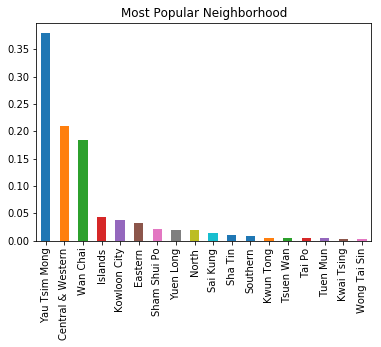

In [30]:
(pop_neighborhood_count/listings_summary_df.shape[0]).plot(kind='bar');
plt.title('Most Popular Neighborhood')

### Find host with the greatest amount of listings

In [15]:
listings_summary_df['host_id'].value_counts().reset_index()

,index,host_id
0,7518056,484
1,97240131,216
2,122131447,163
3,14861546,100
4,138649185,83
5,21591327,81
6,4584648,80
7,52473150,72
8,156409670,63
9,30098437,54


### Find most expensive listing

In [25]:
cal_df_filtered = cal_df[cal_df['price'].isnull()==False]
cal_df_filtered.shape

(4587685, 7)

In [26]:
cal_df.sort_values(by=['price'], ascending =False).head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4308245,35620700,2020-01-16,f,$999.00,$999.00,1,500
4434203,36051133,2019-12-10,f,$999.00,$999.00,6,60
4434210,36051133,2019-12-17,f,$999.00,$999.00,6,60
4434209,36051133,2019-12-16,f,$999.00,$999.00,6,60
4434208,36051133,2019-12-15,f,$999.00,$999.00,6,60


In [10]:
final_df = pd.DataFrame()
for chunk in pd.read_csv(r'data/listings.csv', chunksize=100):
#     import pdb; pdb.set_trace()
    final_df = final_df.append(chunk[chunk['reviews_per_month'] >= 4.0])